In [0]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

In [0]:
from matplotlib import pyplot as plt

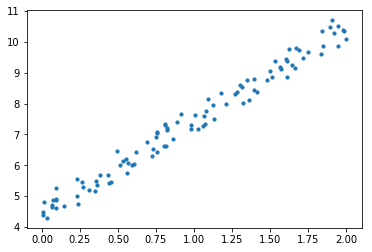

In [4]:
plt.scatter(X,y,s=10)

In [0]:
X_b = np.c_[np.ones((100, 1)), X] 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[4.46421815],
       [2.99689225]])

In [7]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.46421815],
       [10.45800265]])

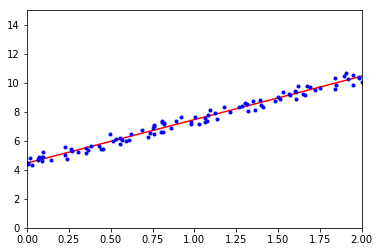

In [8]:
plt.plot(X_new, y_predict,'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()


In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.46421815]), array([[2.99689225]]))

In [0]:
y_pred = lin_reg.predict(X_new)

In [11]:
y_pred

array([[ 4.46421815],
       [10.45800265]])

In [13]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0 = 0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [14]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.4476303]), array([3.01721995]))

In [0]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + 2 + np.random.randn(m,1)

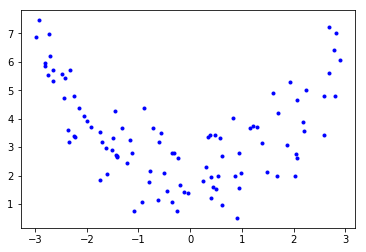

In [20]:
plt.plot(X,y,'b.')

In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias = False)
X_poly = poly_features.fit_transform(X)

In [22]:
X[0]

array([1.14739308])

In [23]:
X_poly[0]

array([1.14739308, 1.31651088])

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9608082]), array([[-0.01942947,  0.49384087]]))

In [0]:
y_pred = lin_reg.predict(X_poly)

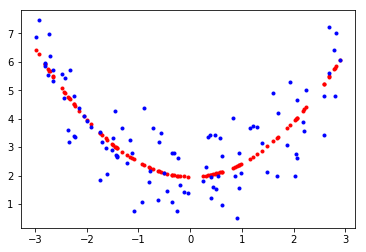

In [37]:
plt.plot(X,y_pred,'b.',color='red')
plt.plot(X, y,'b.')
plt.show()

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
  X_train,X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
  train_errors, val_errors = [],[]
  for m in range(1,len(X_train)):
    model.fit(X_train[:m],y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='train')
  plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='val')



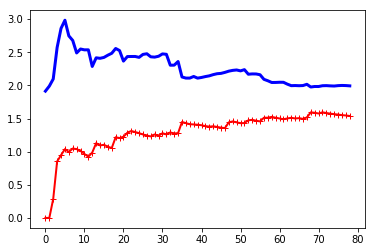

In [39]:
lin_reg = LinearRegression()

plot_learning_curves(lin_reg,X,y)